In [9]:
import math
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, expon, wilcoxon
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_ind_from_stats
from statsmodels.stats.proportion import proportions_ztest

from statsmodels.stats import weightstats as stests

В файле test_3 лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email. Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

H0 - конверсия не изменилась

In [4]:
df = pd.read_csv('/home/marina/Documents/data_analysis/test_3.csv')

control_df = df[df.group == 'control']
test_df = df[df.group == 'test']

In [5]:
df

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1
...,...,...,...
20028,control,20029,0
20029,control,20030,1
20030,control,20031,1
20031,control,20032,0


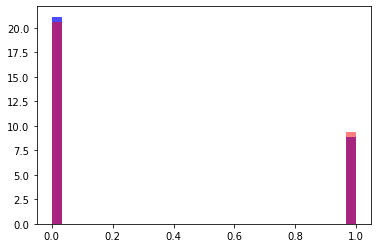

In [7]:
plt.hist(test_df.click_flg, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control_df.click_flg, bins=30, density=True, color='red', alpha=0.5)
plt.show()

In [12]:
stat, pval = proportions_ztest([sum(control_df.click_flg), sum(test_df.click_flg)], 
                                [len(control_df.click_flg), len(test_df.click_flg)]) 
print("test statistic =", stat)
print("p-value =", pval)

test statistic = 2.595183244634136
p-value = 0.009454050012441642


Не можем отвергнуть Н0, то есть принимаем, что конверсия осталась прежней.